In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
# Entrada
 
r=0.065
vol=0.3626 #volatilidade de preço por ano
delta_t=1 #um ano
u=math.exp(vol*math.sqrt(delta_t))  #subida de P
d=1/u #define d como inverso de u
s= 0.001 #sucesso de I
ins=1/s #define insucesso como inverso do sucesso
i=0
#Matriz
U=np.array([[math.pow(u,2),math.pow(u,2),1,1],[math.pow(s,2),1,math.pow(s,2),1],[math.pow(u*s,2),math.pow(u,2),math.pow(s,2),1],[1,1,1,1]])

#vetor A
A=np.array([[u],[s],[(u*s)],[(1/(1+r))]])

#DataFrame
coluna=['u','d','s','i','phi_us','phi_ui','phi_ds','phi_di']
df=pd.DataFrame(columns=coluna)
#Inversão
phi=np.linalg.solve(U,A)
phi_us=phi[0,0]
phi_ui=phi[1,0]
phi_ds=phi[2,0]
phi_di=phi[3,0]

#while phi_u>0 and phi_d>0 and i<2000 : 

while  i<2000 : 
    ins=1/s
    #
    U=np.array([[math.pow(u,2),math.pow(u,2),1,1],[math.pow(s,2),1,math.pow(s,2),1],[math.pow(u*s,2),math.pow(u,2),math.pow(s,2),1],[1,1,1,1]])
    A=np.array([[u],[s],[(u*s)],[(1/(1+r))]])
    phi=np.linalg.solve(U,A)
    #
    phi_us=phi[0,0]
    phi_ui=phi[1,0]
    phi_ds=phi[2,0]
    phi_di=phi[3,0]
    #
    df.loc[i,'u']=u
    df.loc[i,'d']=d
    df.loc[i,'s']=s
    df.loc[i,'i']=ins 
    df.loc[i,'phi_us']=phi_us
    df.loc[i,'phi_ui']=phi_ui
    df.loc[i,'phi_ds']=phi_ds
    df.loc[i,'phi_di']=phi_di 
    
    if (df.loc[i,'phi_us']<0) or (df.loc[i,'phi_ui']<0) or (df.loc[i,'phi_ds']<0) or (df.loc[i,'phi_di']<0) :
        df.loc[i,'phi_us']=np.nan
        df.loc[i,'phi_ui']=np.nan
        df.loc[i,'phi_ds']=np.nan
        df.loc[i,'phi_di']=np.nan
            
    i=i+1
    s=s+0.01

In [28]:
df.head()


,u,d,s,i,phi_us,phi_ui,phi_ds,phi_di
0,1.43706,0.695865,0.001,1000,0.467221,0.000409863,0.470748,0.000589199
1,1.43706,0.695865,0.011,90.9091,0.463173,0.00445759,0.464907,0.00643011
2,1.43706,0.695865,0.021,47.619,0.459216,0.00841442,0.459156,0.0121806
3,1.43706,0.695865,0.031,32.2581,0.455348,0.0122827,0.453493,0.017844
4,1.43706,0.695865,0.041,24.3902,0.451566,0.0160645,0.447913,0.0234235


In [29]:
df.shape

(2000, 8)

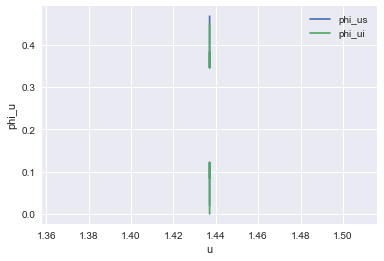

In [30]:
plt.plot(df.u,df[['phi_us','phi_ui']])
plt.xlabel('u')
plt.ylabel('phi_u')
plt.legend(('phi_us','phi_ui'))


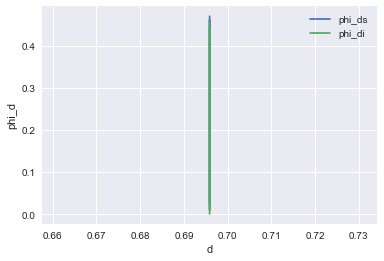

In [31]:
plt.plot(df.d,df[['phi_ds','phi_di']])
plt.xlabel('d')
plt.ylabel('phi_d')
plt.legend(('phi_ds','phi_di'))


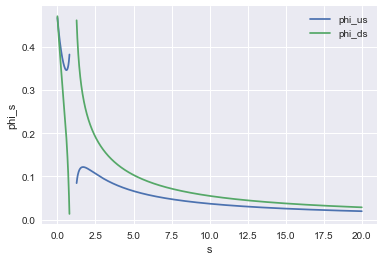

In [32]:
plt.plot(df.s,df[['phi_us','phi_ds']])
plt.xlabel('s')
plt.ylabel('phi_s')
plt.legend(('phi_us','phi_ds'))

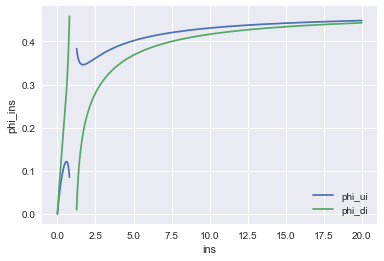

In [33]:
plt.plot(df.s,df[['phi_ui','phi_di']])
plt.xlabel('ins')
plt.ylabel('phi_ins')
plt.legend(('phi_ui','phi_di'))

In [26]:
df.to_excel('df11.xls')